In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.utils import resample

%matplotlib inline

Statistics for Data Science and AI**

*by: Danielle Souza Da Silva*

### **Table of Contents:**

* Section 1: Introduction

* Section 2: Analysis 1

    * Section 2.1: Implementing Regression Model A
    
    * Section 2.2: Implementing Regression Model B
    
    * Section 2.3: Using Bootstrap technique to estimate the distribution of the difference in the R2 parameter and CI intervals
    
* Section 3: Analysis 2

    * Section 3.1: Implementing Regression Model C
    
    * Section 3.2: Implementing Regression Model D
    
    * Section 3.3: Using Bootstrap technique to estimate the distribution of the difference in the RMSE parameter and CI intervals

### **Section 1: Introduction:**

In this notebook I will be implementing four regression models, using the bootstrap technique and confidence intervals to perform additional analysis of the storks data. 

In the first analysis, two regression models will be implemented where the birth rate is the target variable. Model A has the number of storks as the predictor and Model B has the population size as the predictor. The objective of this analysis is to compare the two regression models and to explain the variability of the number of births. 

In the second analysis, two regression models will also be implemented where number of stork pairs is the target variable. Model C will have the land area per $km^2$ as the predictor, and Model D will have two predictors, the population density and the suitable land area. This part will allow us to compare the performance of the two models and to make a prediction on the number of stork pairs based on the chosen predictor variables. 

### **Section 2: Analysis 1**

In this section, I have implemented the two regression models A and B and used the bootstrap technique to estimate the distribution of the difference in the R2 coefficient of determination parameter of the two models.

**Loading data frame**

In [2]:
df = pd.read_csv('storks.csv') # Loading csv file
df

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


### **Section 2.1: Implementing Regression Model A**

Regression Model A has the birth rate as the target variable and the stork pair number as the predictor.


Here, I have labeled the variable y as the target variable and X as the predictor variable.

In [3]:
y = df.BirthRate # this is the target variable
X = np.column_stack((df.Storks)).T # predictor variable

**Comments Regression Model A Results:**

For the stork pair number, the coefficient of determination R2 has value 0.385. This implies that the number of stork pairs explains around 39% of variability for the number of births. 

The intercept is 225, which implies that when the number of storks is zero the birth rate per year is predicted to be 225.

The stork regression coefficient is 0.029 which implies that as the number of storks increases the predicted birth rate also increases by this factor plus the intercept. 

In [4]:
reg_S = LinearRegression().fit(X, y)
beta_Storks = reg_S.coef_
print('The R2 coefficient of determination is %4.3f' % reg_S.score(X, y))
print('The intercept is %4.1f' % reg_S.intercept_)
print('The Stork regression coefficient is:', reg_S.coef_)

The R2 coefficient of determination is 0.385
The intercept is 225.0
The Stork regression coefficient is: [0.02879364]


**Model A: Regression Scatter Plot**

Below, we can observe the relationship between predicted vs actual birth rate results on the scatter plot. The graph shows that as the actual value increases so does the predicted value for birth rate. 

Text(0.5, 1.0, 'Predicted vs Actual Birth Rate Per Year')

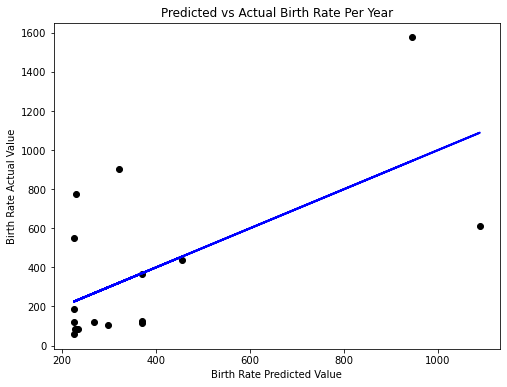

In [5]:
y_hat_1 = reg_S.predict(X)
fig, a = plt.subplots(1,1,figsize=(8,6))
a.scatter(y_hat_1, y,  color='black')
a.plot(y_hat_1, y_hat_1, color='blue', linewidth=2)

a.set_xlabel('Birth Rate Predicted Value')
a.set_ylabel('Birth Rate Actual Value')
a.set_title('Predicted vs Actual Birth Rate Per Year')

**Residual Error Distribution for Model A**

Below, I have plotted the residual error distribution for this model. As we can see below, the error distribution is not normal. We can see that there are some outliers in the distribution. As the error distribution is not normal, this may imply that the error is not consistent across our model. 

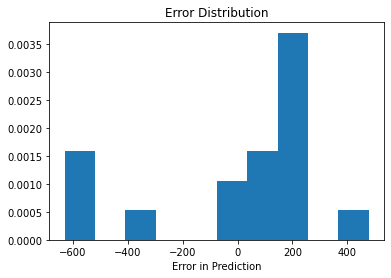

In [6]:
y_hat_1 = reg_S.predict(X)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat_1 - y
a1.hist(residuals,density=True)
a1.set_title('Error Distribution')
_ = a1.set_xlabel('Error in Prediction')

### **Section 2.2: Implementing Regression Model B**

In this section, we are also using the target variable as the birth rate. The predictor variable is the Population size from the data frame. The population size are scaled on the data frame, i.e. in the $10^6$ Humans, however since this would not affect our regression results I have opted to not re-scale the population size to its actual value.

Below, I have set the predictor variable as X2.

In [7]:
X2 = np.column_stack((df.Humans)).T # Predictor X2 = humans from data frame

**Comments Regression Model B Results:**

The R2 coefficient of determination tells us that the population size explains about 73% of the variability of the birth rate values. This indicates how significant this predictor variable is for the prediction of the birth rate results.

The intercept for the model is -8.4.

The Population size regression coefficient is 14.8 (to 2 decimal places), this indicates that the model has a positive slope. Therefore, as the population size increases so does the predicted birth rate. We should also note that the population size has a bigger weight as the coefficient, if we compare it to the storks coefficient which is 0.029, meaning that the population size may have a bigger impact than the stork numbers.

In [8]:
reg_H = LinearRegression().fit(X2, y)
beta_BirthRate = reg_H.coef_
print('The R2 coefficient of determination is %4.3f' % reg_H.score(X2, y))
print('The intercept is %4.1f' % reg_H.intercept_)
print('The Population size regression coefficient is:', reg_H.coef_)

The R2 coefficient of determination is 0.725
The intercept is -8.4
The Population size regression coefficient is: [14.83444462]


**Model B: Regression Scatter Plot**

Below, we can see the relationship between the actual vs predicted birth rate values having the population size as its predictor. Compared to the model A regression scatter plot, it is clear that the population size has a better fit than the number of Storks meaning that it may be a better predictor. 

Text(0.5, 1.0, 'Predicted vs Actual Birth Rate Per Year')

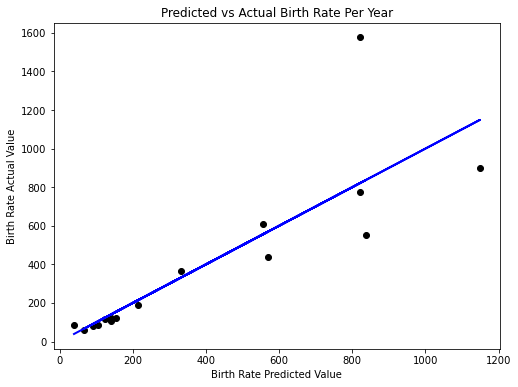

In [9]:
y_hat_2 = reg_H.predict(X2)
fig, a = plt.subplots(1,1,figsize=(8,6))
a.scatter(y_hat_2, y,  color='black')
a.plot(y_hat_2, y_hat_2, color='blue', linewidth=2)

a.set_xlabel('Birth Rate Predicted Value')
a.set_ylabel('Birth Rate Actual Value')
a.set_title('Predicted vs Actual Birth Rate Per Year')

**Residual Error Distribution for Model B**

As with model A, the residual error distribution for model B is not normally distributed as seen on the histogram below and also contains outliers. This means that the error rate is not consistent across our model. 

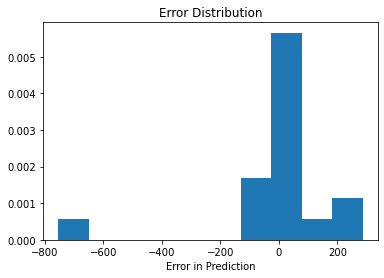

In [10]:
y_hat_2 = reg_H.predict(X2)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat_2 - y
a1.hist(residuals, density=True)
a1.set_title('Error Distribution')
_ = a1.set_xlabel('Error in Prediction')

### **Section 2.3: Using Bootstrap technique to estimate the distribution of the difference in the R2 parameter and CI intervals**

In this section, I have used the bootstrap technique to resample the storks data 500 times.

Here, I have used the Bootstrap function that was implemented in the lab's notebook.

In [11]:
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(data)) # default is to resample, same size
    return result

The regression function below returns the regression values such as the intercept, the beta coefficients and the R2 values for each model. 

In [12]:
def doRegression(df) :
    y = df.BirthRate # this is the target variable
    X1 = np.column_stack(df.Storks).T # Predictor for Model A
    X2 = np.column_stack(df.Humans).T # Predictor for Model B
    reg1 = LinearRegression().fit(X1, y)
    reg2 = LinearRegression().fit(X2, y)
    beta_Storks = reg1.coef_[0]
    beta_Humans = reg2.coef_[0]
    return [reg1.intercept_, reg2.intercept_, beta_Storks, beta_Humans, reg1.score(X1, y), reg2.score(X2,y)] 

Here, I have calculated the difference between the two R2 coefficients of determination from the two models A and B after the data was resampled using the bootstrap method.

The difference was calculated as follows:

R2_Difference = R2_Model_B - R2_Model_A

In [13]:
bstrap = bootstrapC(df, ['Intercept_Storks', 'Intercept_Humans', 'BetaStorks', 'BetaHumans', 'R2_Storks', 'R2_Humans'], 500, doRegression) 
bstrap['R2_Diff'] = bstrap['R2_Humans'] - bstrap['R2_Storks']
bstrap

,Intercept_Storks,Intercept_Humans,BetaStorks,BetaHumans,R2_Storks,R2_Humans,R2_Diff
0,96.068902,-113.272774,0.033804,20.613458,0.639772,0.765085,0.125313
1,280.838201,-38.100575,0.032558,15.908313,0.487034,0.591192,0.104157
2,175.793328,-110.377473,0.051407,20.182464,0.786693,0.772153,-0.014540
3,170.604208,-122.335691,0.034526,23.001768,0.536304,0.780539,0.244236
4,300.334842,24.132215,0.011279,10.638147,0.079585,0.956797,0.877211
...,...,...,...,...,...,...,...
495,167.433854,13.103030,0.025806,11.508833,0.076637,0.940824,0.864187
496,250.374457,39.557758,0.011621,10.027243,0.250522,0.889743,0.639221
497,294.460646,-2.999524,0.024665,14.697492,0.251762,0.759329,0.507567
498,171.306200,-10.522622,0.054300,17.755662,0.734349,0.689817,-0.044532


**Distribution of the difference between the R2 parameter for model A and B**

Below, we can observe the distribution for the difference in the R2 coefficient between model A and B. As the histogram shows, the distribution is bimodal and it is mostly positive. These findings may imply that as the differences are mostly positive, the population size variable explains the variability of the birth rate better than the number of stork pairs. 

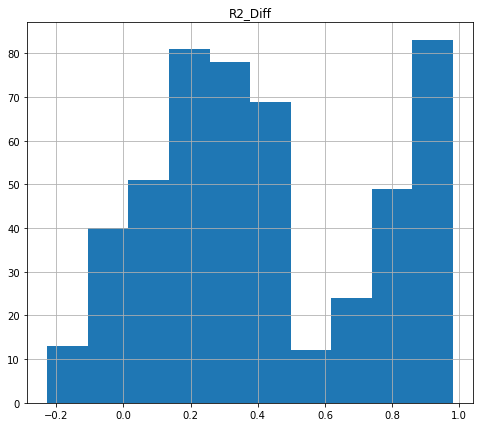

In [14]:
_ = bstrap.hist('R2_Diff',figsize=(8,7))

**Confidence Interval for the difference in the R2 values**

The confidence interval for the difference in the R2 values with a 90% confidence level is from -0.06 to 0.93. The interval indicates that there is a 90% confidence that the difference between the two R2 values will be within this interval. Since the interval has mainly positive numbers (i.e from 0 to 0.93), we can be confident that the R2 value for the population size will be higher than the R2 value for the stork pair numbers, which means that the population size explains more variability in the birth rate data than the number of storks.

In [15]:
reg1_intercept, reg2_intercept, beta_Storks, beta_Humans, reg1_Storks, reg2_Humans = doRegression(df)

print("The difference of the R2 coefficient of determination of Humans and Storks has 90%% CI from %3.2f to %3.2f" % 
      (bstrap.R2_Diff.quantile(0.05), bstrap.R2_Diff.quantile(0.95)))

The difference of the R2 coefficient of determination of Humans and Storks has 90% CI from -0.07 to 0.93


### **Section 3: Analysis 2**

**Data preparation:**

In this section, I have prepared the data frame by calculating the population density and suitable area per $km^2$ values.

Below, these calculation are performed:

*Population Density = Population Size / Area per $km^2$*

*Suitable Area = (Area * Suitable Area Percent)/100*

In [16]:
df['PopulationDensity'] = df['Humans']/df['Area']
df['SuitableArea'] = (df['Area']*df['SuitableAreaPercent'])/100

### **Section 3.1: Implementing Regression Model C**

In this section, we will be implementing the regression model C, which has as target variable the number of storks and as its predictor variable the Area per $km^2$.

Below, the target variable is labeled y, and the predictor variable is labeled X3.

In [17]:
y = df.Storks # this is the target variable
X3 = np.column_stack((df.Area)).T

**Regression Results Comments:**

The Area R2 parameter is 0.34 which means that the Area explains about 34% of the variability of the stork pair numbers.

The regression coefficient is 0.0233 (to 4 decimal places), this implies that as the area increases so does the predicted stork pair numbers. 

In [18]:
reg_A = LinearRegression().fit(X3, y)
beta_Area = reg_A.coef_

print('The R2 coefficient of determination is %4.3f' % reg_A.score(X3, y))
print('The intercept is %4.1f' % reg_A.intercept_)
print('The Area per square km regression coefficient is:', reg_A.coef_)

The R2 coefficient of determination is 0.336
The intercept is -60.7
The Area per square km regression coefficient is: [0.02330737]


**Model C: Regression Scatter Plot**

Below, we can see the scatter plot for the actual vs predictor numbers of storks. We can observe that the slope is positive, as the actual number of storks increases its predicted value also increases. 

Text(0.5, 1.0, 'Predicted vs Actual Birth Rate Per Year')

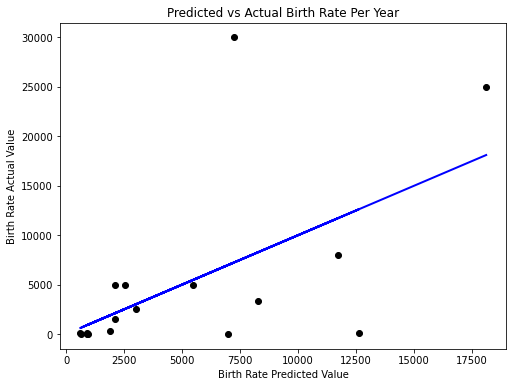

In [19]:
y_hat_A = reg_A.predict(X3)
fig, a = plt.subplots(1,1,figsize=(8,6))
a.scatter(y_hat_A, y,  color='black')
a.plot(y_hat_A, y_hat_A, color='blue', linewidth=2)

a.set_xlabel('Birth Rate Predicted Value')
a.set_ylabel('Birth Rate Actual Value')
a.set_title('Predicted vs Actual Birth Rate Per Year')

**Residual Error Distribution for Model C**

As seen below, the error distribution for model C shows a close to normal distribution, as with the previous models it has outliers.

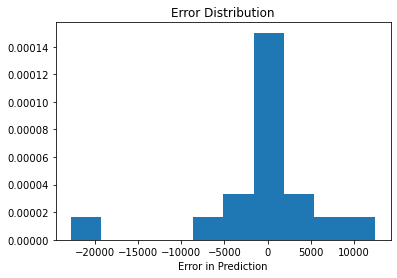

In [20]:
y_hat_A = reg_A.predict(X3)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat_A - y
a1.hist(residuals, density=True)
a1.set_title('Error Distribution')
_ = a1.set_xlabel('Error in Prediction')

### **Section 3.1: Implementing Regression Model D**

In this section, we will be implementing the regression model D, which has as target variable the number of storks and as its predictor variables the  Suitable Area per $km^2$ and Population density.

Below, the target variable is labeled y, and the predictor variable is labeled X4 which included both predictor variables.

In [21]:
X4 = np.column_stack((df.SuitableArea, df.PopulationDensity))

**Variables Matrix Heat Map:**

Below, I have implemented a heat map to display the correlation between the predictor variables. As we can see, the correlation between Suitable Area and Population density is 0.28 which is not strong. This shows that these variables do not have a strong linear relationship which helps the goodness of fit in our model.

<AxesSubplot:>

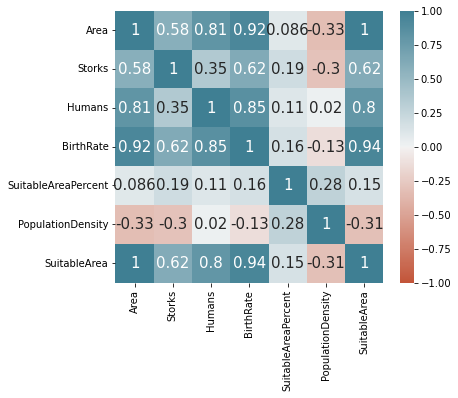

In [22]:
import seaborn as sns 
fig,ax = plt.subplots(1,1, figsize=(6,5))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 15})

**Regression Results Comments:**

The R2 coefficient is 0.393 which implies that about 39% of the Suitable Area and Population density data explains the number of storks.

The regression coefficient for the Suitable Area is 0.037 (to 3 decimal places) and for the population density it's around -12132597. By comparing the two coefficients, we can conclude that the population density has a bigger impact on the model since its coefficient has a much larger number. 

In [23]:
reg_B = LinearRegression().fit(X4, y)
beta_SuitableArea, beta_Pop = reg_B.coef_
print('The R2 coefficient of determination is %4.3f' % reg_B.score(X4, y))
print('The intercept is %4.1f' % reg_B.intercept_)
print('The Suitable Area regression coefficient is:', beta_SuitableArea)
print('The Population Density regression coefficient is:', beta_Pop)

The R2 coefficient of determination is 0.393
The intercept is 1881.4
The Suitable Area regression coefficient is: 0.036706576927433635
The Population Density regression coefficient is: -12132597.88804482


**Model D: Regression Scatter Plot**

Below, we can see the scatter plot showing the relationship between the actual and predicted stork values. It shows that as the actual values increase so does the predicted values.

Text(0.5, 1.0, 'Predicted vs Actual Birth Rate Per Year')

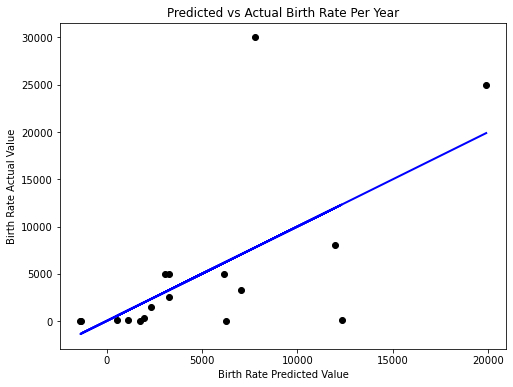

In [24]:
y_hat_B = reg_B.predict(X4)
fig, a = plt.subplots(1,1,figsize=(8,6))
a.scatter(y_hat_B, y,  color='black')
a.plot(y_hat_B, y_hat_B, color='blue', linewidth=2)

a.set_xlabel('Birth Rate Predicted Value')
a.set_ylabel('Birth Rate Actual Value')
a.set_title('Predicted vs Actual Birth Rate Per Year')

**Residual Error Distribution for Model D**

The error distribution for model D also has a close to normal distribution and as with all other models, it contains a few outliers as seen in the histogram below.

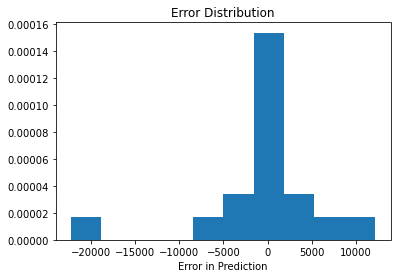

In [25]:
y_hat_D = reg_B.predict(X4)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat_D - y
a1.hist(residuals, density=True)
a1.set_title('Error Distribution')
_ = a1.set_xlabel('Error in Prediction')

### **Section 3.3: Using Bootstrap technique to estimate the distribution of the difference in the RMSE parameters and CI intervals**

In this section, I have used the bootstrap technique to resample the regression model 500 times, the RMSE parameter was calculated for both models and the difference between the two calculated.

The regression function below returns the RMSE values for both models.

In [26]:
def doRegression(data) :
    y = data.Storks # this is the target variable
    X3 = np.column_stack(data.Area).T # Predictor for Model A
    X4 = np.column_stack((data.SuitableArea, data.PopulationDensity)) # Predictor for Model B
    reg3 = LinearRegression().fit(X3, y)
    reg4 = LinearRegression().fit(X4, y)
    beta_Area = reg3.coef_[0]
    beta_Suit, beta_Pop = reg4.coef_
    return [mean_squared_error(y, reg3.predict(X3), squared=False), mean_squared_error(y, reg4.predict(X4), squared=False)] 

Here, I have calculated the difference of the RMSE parameter between model C and D:

RMSE_Difference = RMSE_C - RMSE_D

In [27]:
bstrap = bootstrapC(df, ['RMSE_A', 'RMSE_B'], 500, doRegression) 
bstrap['RMSE_Diff'] = bstrap['RMSE_A']-bstrap['RMSE_B']
bstrap

,RMSE_A,RMSE_B,RMSE_Diff
0,6983.183374,6602.251502,380.931872
1,6853.140878,6749.448906,103.691972
2,6775.137230,6436.565651,338.571580
3,4531.164572,3986.574784,544.589789
4,3433.315854,2914.294792,519.021061
...,...,...,...
495,9297.729112,8789.960413,507.768699
496,4678.346046,4073.923679,604.422368
497,9531.939489,9082.316157,449.623332
498,2192.630040,1784.555638,408.074402


**RMSE Difference Distribution**

Below, we can observe the distribution for the difference of the RMSE parameter of both models. We can observe that the difference distribution is positively skewed and all values are positive meaning that model C has a RMSE distribution of higher values compared to the model D's RMSE values distribution. This implies that model C has got a higher root mean squared error values than model D, which implies that model D may be a better model to predict the number of storks.

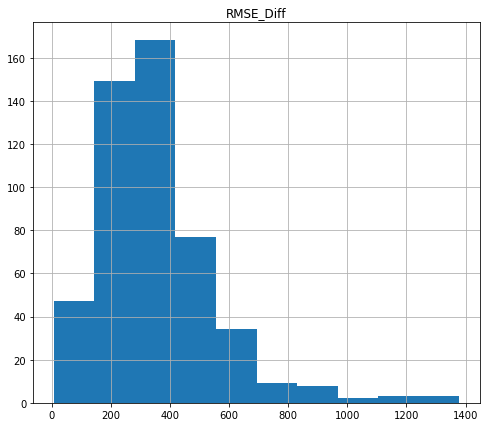

In [28]:
_ = bstrap.hist('RMSE_Diff',figsize=(8,7))

**Confidence Interval for the difference in the RMSE values**

The 90% confidence interval for the difference in the RMSE values of the two models is between 108.17 to 632.44. This implies that there is a 90% confidence that the difference between the RMSE values will be within this interval. As the interval only contains positive numbers, we can conclude that model C would have a higher RMSE value than the model D's RMSE, which implies that model D would be a better model to predict the number of storks. Therefore, we can be confident that the model where we have the suitable area and population density as the predictor will be able to predict the number of storks better than the model where the predictor is the area.

In [29]:
RMSE_A, RMSE_B = doRegression(df)

print("The difference of the RMSE coefficient of model A and model B has 90%% CI from %3.2f to %3.2f" % 
      (bstrap.RMSE_Diff.quantile(0.05), bstrap.RMSE_Diff.quantile(0.95)))

The difference of the RMSE coefficient of model A and model B has 90% CI from 111.65 to 690.29
